### Import module

In [3]:
import os
import pandas as pd
import numpy as np
import logging
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from datetime import datetime

logging.basicConfig(format="%(asctime)s-%(name)s-%(levelname)s-%(message)s")
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)
logger.info('started')

current_date = datetime(2020, 3, 5)

2024-02-26 00:30:10,821-__main__-INFO-started


### Functions

In [4]:
def read_data() -> pd.DataFrame:
    '''
    Read the columns we need in raw data.
    '''
    ROOT = os.path.dirname(os.getcwd())
    DATASET = os.path.join(ROOT, "data")
        
    data = {}
    for filename in os.listdir(DATASET):
        data_tmp = pd.read_csv(f'{DATASET}/{filename}')
        data[filename] = data_tmp
        logger.info(f'{filename} is read')

    data_all = pd.DataFrame()
    for key in data.keys():
        data_all = pd.concat([data_all, data[key]])
        
    data_all = data_all.sort_values(by='event_time').reset_index(drop=True)
    
    return data_all


def purchase_value_distribution(data: pd.DataFrame, target: str, col_name: str) -> None:
    '''
    Plot the distribution of target value.
    '''
    data_purchase = data[data['event_type']=='purchase']
    if target == 'product':
        value = data_purchase.groupby(col_name)['price'].last().reset_index().rename(columns={'price':f'{target}_value'})
    elif target == 'order':
        value = data_purchase.groupby(col_name)['price'].sum().reset_index().rename(columns={'price':f'{target}_value'})
    
    value = value[value[f'{target}_value']>0]

    ninety_fifth_percentile = value[f'{target}_value'].quantile(0.95)
    twenty_fifth_percentile = value[f'{target}_value'].quantile(0.25)
    median = value[f'{target}_value'].median()
    seventy_fifth_percentile = value[f'{target}_value'].quantile(0.75)

    positive_data = value[value[f'{target}_value'] < ninety_fifth_percentile][f'{target}_value']

    plt.hist(positive_data, bins=50, alpha=0.5, color='slateblue', edgecolor='slategray')
    plt.axvline(twenty_fifth_percentile, color='black', linestyle='dashed', linewidth=1.5)
    plt.axvline(median, color='black', linestyle='dashed', linewidth=1.5)
    plt.axvline(seventy_fifth_percentile, color='black', linestyle='dashed', linewidth=1.5)
    plt.legend({'25th Percentile': twenty_fifth_percentile, 'Median': median, '75th Percentile':seventy_fifth_percentile})

    plt.title(f'{target} Value Distribution below 95%')
    plt.xlabel(f'{target} Value')
    plt.ylabel(f'{target} Amount')

    plt.show() 

    return None

### EDA before classfication

In [25]:
data = read_data()

2024-02-26 00:46:30,430-__main__-INFO-2020-Jan.csv is read
2024-02-26 00:46:34,801-__main__-INFO-2019-Dec.csv is read
2024-02-26 00:46:39,786-__main__-INFO-2020-Feb.csv is read
2024-02-26 00:46:45,336-__main__-INFO-2019-Nov.csv is read
2024-02-26 00:46:50,425-__main__-INFO-2019-Oct.csv is read


#### 查看客單價分佈

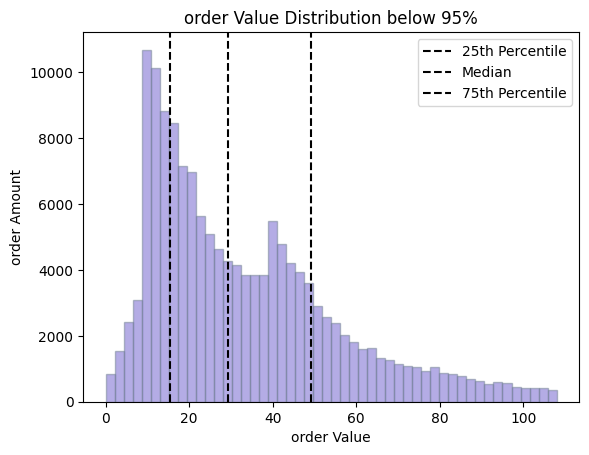

In [32]:
purchase_value_distribution(data, 'order', 'user_session')

#### 查看單一商品價格分佈

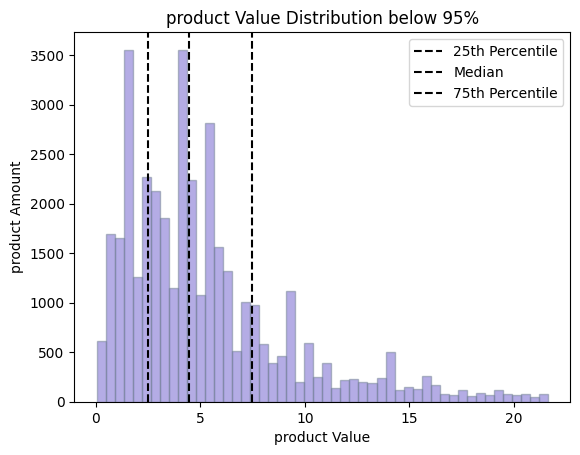

In [34]:
purchase_value_distribution(data, 'product', 'product_id')